In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets
from torchvision import transforms

import numpy as np
from tqdm import tqdm
import math
import random

import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([
                    transforms.ToTensor(), 
                    # transforms.Normalize((0.5,), (0.5,)),
            ])

RandPercent = 0
def randomLabels(y):
    if random.random() <= RandPercent:
        return random.randint(0,9)
    return y

In [3]:
def CreateDataLoaders(Option, p_BatchSize, RandomNoisePerc = None):
    if Option == 1:
        train_dataset = datasets.MNIST("./", train=True, transform = transform, download=True)
        train_subset, val_subset = torch.utils.data.random_split(train_dataset, [int(len(train_dataset) * 0.85), int(len(train_dataset) * 0.15)], generator=torch.Generator().manual_seed(1))
        test_dataset = datasets.MNIST("./", train=False, transform = transform, download=True)
    elif Option == 2:
        train_dataset = datasets.FashionMNIST("./", train=True, transform = transform, download=True)
        train_subset, val_subset = torch.utils.data.random_split(train_dataset, [int(len(train_dataset) * 0.85), int(len(train_dataset) * 0.15)], generator=torch.Generator().manual_seed(1))
        test_dataset = datasets.FashionMNIST("./", train=False, transform = transform, download=True)
    
    elif Option == 5:
        train_dataset = datasets.CIFAR10("./", train=True, transform = transform, download=True)
        train_subset, val_subset = torch.utils.data.random_split(train_dataset, [int(len(train_dataset) * 0.85), int(len(train_dataset) * 0.15)], generator=torch.Generator().manual_seed(1))
        test_dataset = datasets.CIFAR10("./", train=False, transform = transform, download=True)
    
    elif Option == 6:
        train_dataset = datasets.CIFAR100("./", train=True, transform = transform, download=True)
        train_subset, val_subset = torch.utils.data.random_split(train_dataset, [int(len(train_dataset) * 0.85), int(len(train_dataset) * 0.15)], generator=torch.Generator().manual_seed(1))
        test_dataset = datasets.CIFAR100("./", train=False, transform = transform, download=True)

    elif Option == 7:
        RandPercent = RandomNoisePerc
        train_dataset = datasets.CIFAR10("./", train=True, transform = transform, target_transform = randomLabels, download=True)
        train_subset, val_subset = torch.utils.data.random_split(train_dataset, [int(len(train_dataset) * 0.85), int(len(train_dataset) * 0.15)], generator=torch.Generator().manual_seed(1))
        test_dataset = datasets.CIFAR10("./", train=False, transform = transform, download=True)

    
    Train_DataLoader = torch.utils.data.DataLoader(train_subset, batch_size = p_BatchSize, shuffle = True)
    Val_DataLoader = torch.utils.data.DataLoader(val_subset, batch_size = p_BatchSize, shuffle = True)
    Test_DataLoader = torch.utils.data.DataLoader(test_dataset, batch_size = p_BatchSize, shuffle = True)

    return Train_DataLoader, Val_DataLoader, Test_DataLoader

In [4]:
def PlotGraph(X, Y1, Y2):
    plt.plot(X, Y1, label = 'Train')
    plt.plot(X, Y2, label = "Val")

    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")

    plt.legend(loc='best')
    plt.show()

In [5]:
# class AllConv_IOCN(nn.Module):
#     def __init__(self, OutputDim):
#         super(AllConv_IOCN, self).__init__()
#         # self.InputDim = InputDim
#         self.OutputDim = OutputDim
        
#         self.Conv1 = nn.Conv2d(3, 96, kernel_size = 3)
#         self.Conv2 = nn.Conv2d(96, 96, kernel_size = 3)
#         self.Conv3 = nn.Conv2d(96, 96, kernel_size = 3, stride = 2)
#         self.Conv4 = nn.Conv2d(96, 192, kernel_size = 3)
#         self.Conv5 = nn.Conv2d(192, 192, kernel_size = 3)
#         self.Conv6 = nn.Conv2d(192, 192, kernel_size = 3, stride = 2)
#         self.Conv7 = nn.Conv2d(192, 192, kernel_size = 3)
#         self.Conv8 = nn.Conv2d(192, 192, kernel_size = 1)
#         self.Conv9 = nn.Conv2d(192, self.OutputDim, kernel_size = 1)

#         self.AvgPool = nn.AvgPool2d(kernel_size = 2) # In Paper it is mentioned to avg pool on 6 x 6

#         self.ActFunc = nn.functional.elu
#         # self.batch = nn.BatchNorm1d(800)
#         # self.SftMax = nn.Softmax

#     def forward(self, x):
#         # print(x.shape)
#         x = self.ActFunc(self.Conv1(x))
#         # print(x.shape)
#         x = self.ActFunc(self.Conv2(x))
#         # print(x.shape)
#         x = self.ActFunc(self.Conv3(x))
#         # print(x.shape)
#         x = self.ActFunc(self.Conv4(x))
#         # print(x.shape)
#         x = self.ActFunc(self.Conv5(x))
#         # print(x.shape)
#         x = self.ActFunc(self.Conv6(x))
#         # print(x.shape)
#         x = self.ActFunc(self.Conv7(x))
#         # print(x.shape)
#         x = self.ActFunc(self.Conv8(x))
#         # print(x.shape)
#         x = self.ActFunc(self.Conv9(x))
#         # print(x.shape)
#         # print("Conv done")
#         x = self.AvgPool(x)
#         # print(x.shape)
        
#         return x

In [5]:
class AllConv_IOCN(nn.Module):
    def __init__(self, OutputDim):
        super(AllConv_IOCN, self).__init__()
        # self.InputDim = InputDim
        self.OutputDim = OutputDim
        
        self.Conv1 = nn.Conv2d(3, 10, kernel_size = 3) # 32*32*3 -> 15*15*3
        self.Conv2 = nn.Conv2d(10, 20, kernel_size = 3, stride = 2) # 30*30*3 -> 14*14*3
        self.Conv3 = nn.Conv2d(20, 35, kernel_size = 3, stride = 2) # 14*14*3 -> 6*6*3
        self.Conv4 = nn.Conv2d(35, 50, kernel_size = 3, stride = 2) # 6*6*3 -> 2*2*3
        self.Conv5 = nn.Conv2d(50, self.OutputDim, kernel_size = 2) # 2*2*3 -> 1*1*Out

        # self.Conv1 = nn.Conv2d(3, 96, kernel_size = 3)
        # self.Conv2 = nn.Conv2d(96, 96, kernel_size = 3)
        # self.Conv3 = nn.Conv2d(96, 96, kernel_size = 3, stride = 2)
        # self.Conv4 = nn.Conv2d(96, 192, kernel_size = 3)
        # self.Conv5 = nn.Conv2d(192, 192, kernel_size = 3)
        # self.Conv6 = nn.Conv2d(192, 192, kernel_size = 3, stride = 2)
        # self.Conv7 = nn.Conv2d(192, 192, kernel_size = 3)
        # self.Conv8 = nn.Conv2d(192, 192, kernel_size = 1)
        # self.Conv9 = nn.Conv2d(192, self.OutputDim, kernel_size = 1)

        # self.AvgPool = nn.AvgPool2d(kernel_size = 2) # In Paper it is mentioned to avg pool on 6 x 6

        self.ActFunc = nn.functional.elu
        # self.batch = nn.BatchNorm1d(800)
        # self.SftMax = nn.Softmax

    def forward(self, x):
        # print(x.shape)
        x = self.ActFunc(self.Conv1(x))
        # print(x.shape)
        x = self.ActFunc(self.Conv2(x))
        # print(x.shape)
        x = self.ActFunc(self.Conv3(x))
        # print(x.shape)
        x = self.ActFunc(self.Conv4(x))
        # print(x.shape)
        x = self.ActFunc(self.Conv5(x))
        # print(x.shape)
        # x = self.ActFunc(self.Conv6(x))
        # # print(x.shape)
        # x = self.ActFunc(self.Conv7(x))
        # # print(x.shape)
        # x = self.ActFunc(self.Conv8(x))
        # # print(x.shape)
        # x = self.ActFunc(self.Conv9(x))
        # # print(x.shape)
        # # print("Conv done")
        # x = self.AvgPool(x)
        # print(x.shape)
        
        return x

In [6]:
def TrainModel(p_model, loss_criteria, Optimizer, device,  p_TrainDL, Gamma = 5):
    TrainCorr = 0
    TotNumOfSamples = 0

    for images, labels in tqdm(p_TrainDL):
        Optimizer.zero_grad()

        # images = images.reshape(images.shape[0], -1).to(device)
        images = images.to(device)
        labels = labels.to(device)

        pred = p_model(images)
        pred = pred.reshape(pred.shape[0], -1)
        # print(type(pred))
        # print(pred.shape)
        # print(pred)
        # pred=pred.to(torch.float)
        # labels=labels.to(torch.float)
        predClass = torch.max(pred.data, 1)[1]
        # predClass = np.argmax(pred, axis=-1)
        # predClass = pred.max(1)
        # print("Pred", predClass)
        # print(type(labels))
        # print("labels", labels)

        # predClass=predClass.to(torch.float)
        loss = loss_criteria(pred, labels)
        TrainCorr += (predClass==labels).sum()
        TotNumOfSamples += len(labels)
        # print("Correct", TrainCorr, " Out of", TotNumOfSamples)

        loss.backward()
        Optimizer.step()

        for name, param in p_model.named_parameters():
            # if "Linear1" in name or "bias" in name:
            if "Conv1" in name or "bias" in name:
                continue
            tmpParam = param.data
            NewTmpParam = torch.exp(tmpParam - Gamma)
            tmpParam = torch.where(tmpParam<0, NewTmpParam, tmpParam)
            param.data = tmpParam
    
    return TrainCorr/TotNumOfSamples

def EvaluateModel(p_model, p_loader, device):
    Correct = 0
    TotalNumOfSamples = 0

    for images, labels in tqdm(p_loader):
        images = images.to(device)
        labels = labels.to(device)

        pred = p_model(images)
        pred = pred.reshape(pred.shape[0], -1)
        predClass = torch.max(pred.data, 1)[1]
        Correct += (predClass==labels).sum()
        TotalNumOfSamples += len(labels)
        # loss = loss_criteria(predClass, labels)
        # Accuracy += loss.cpu().data.item()

    return Correct/TotalNumOfSamples

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
EPOCHS = 50

Epoch_List = [i+1 for i in range(EPOCHS)]

In [9]:
# # -------------------------------------------- CIFAR-10 Dataset -----------------------------------------------------------
# Option = 5
# Train_DataLoader, Val_DataLoader, Test_DataLoader = CreateDataLoaders(Option, 64)
# ModelName = "Model_AllConv_IOCN_CIFAR10.pt"

# model = AllConv_IOCN(10).to(device)
# loss_criteria = nn.CrossEntropyLoss()
# AdamOpt = torch.optim.Adam(model.parameters(), lr=0.0001)

# ValAccuracy = 0
# TrainAcc_List = []
# ValAcc_List = []

# saved = False
# if saved == True:
#     saved_model = torch.load(ModelName, map_location=torch.device('cpu')).to(device)
# else:
#     model.train()
#     Train_Accuracy = 0

#     for e in range(EPOCHS):
#         Train_Accuracy = TrainModel(model, loss_criteria, AdamOpt, device, Train_DataLoader)
#         val_acc = EvaluateModel(model, Val_DataLoader, device)

#         TrainAcc_List.append(Train_Accuracy.cpu().item())
#         ValAcc_List.append(val_acc.cpu().item())

#         print("EPOCH - ", e+1, ". Train Accuracy = ", Train_Accuracy.cpu().item(), ", Validation Accuracy = ", val_acc.cpu().item())
        
#         if val_acc.cpu().item() > ValAccuracy:
#             print("Model Re-Saved")
#             ValAccuracy = val_acc.cpu().item()
#             torch.save(model, ModelName)

#     saved_model = torch.load(ModelName, map_location=torch.device('cpu')).to(device)


# print()

# Train_Accuracy = EvaluateModel(saved_model, Train_DataLoader, device)
# print("Train Accuracy = ", Train_Accuracy.cpu().item())
# Test_Accuracy = EvaluateModel(saved_model, Test_DataLoader, device)
# print("Test Accuracy = ", Test_Accuracy.cpu().item())

# print("Generalization Gap = ", (Train_Accuracy.cpu().item() - Test_Accuracy.cpu().item()))

In [8]:
# -------------------------------------------- CIFAR-10 Dataset -----------------------------------------------------------
Option = 5
Train_DataLoader, Val_DataLoader, Test_DataLoader = CreateDataLoaders(Option, 64)
ModelName = "Model_AllConv_IOCN_CIFAR10.pt"

model = AllConv_IOCN(10).to(device)
loss_criteria = nn.CrossEntropyLoss()
AdamOpt = torch.optim.Adam(model.parameters())

ValAccuracy = 0
TrainAcc_List = []
ValAcc_List = []

saved = False
if saved == True:
    saved_model = torch.load(ModelName, map_location=torch.device('cpu')).to(device)
else:
    model.train()
    Train_Accuracy = 0

    for e in range(EPOCHS):
        Train_Accuracy = TrainModel(model, loss_criteria, AdamOpt, device, Train_DataLoader)
        val_acc = EvaluateModel(model, Val_DataLoader, device)

        TrainAcc_List.append(Train_Accuracy.cpu().item())
        ValAcc_List.append(val_acc.cpu().item())

        print("EPOCH - ", e+1, ". Train Accuracy = ", Train_Accuracy.cpu().item(), ", Validation Accuracy = ", val_acc.cpu().item())
        
        if val_acc.cpu().item() > ValAccuracy:
            print("Model Re-Saved")
            ValAccuracy = val_acc.cpu().item()
            torch.save(model, ModelName)

    saved_model = torch.load(ModelName, map_location=torch.device('cpu')).to(device)


print()

Train_Accuracy = EvaluateModel(saved_model, Train_DataLoader, device)
print("Train Accuracy = ", Train_Accuracy.cpu().item())
Test_Accuracy = EvaluateModel(saved_model, Test_DataLoader, device)
print("Test Accuracy = ", Test_Accuracy.cpu().item())

print("Generalization Gap = ", (Train_Accuracy.cpu().item() - Test_Accuracy.cpu().item()))

100%|██████████| 170498071/170498071 [00:05<00:00, 29119553.87it/s]


Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


100%|██████████| 118/118 [00:01<00:00, 95.06it/s]


EPOCH -  1 . Train Accuracy =  0.23828235268592834 , Validation Accuracy =  0.25920000672340393
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 86.88it/s]


EPOCH -  2 . Train Accuracy =  0.27207058668136597 , Validation Accuracy =  0.2727999985218048
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 77.95it/s]


EPOCH -  3 . Train Accuracy =  0.30209413170814514 , Validation Accuracy =  0.30693334341049194
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.91it/s]


EPOCH -  4 . Train Accuracy =  0.33016470074653625 , Validation Accuracy =  0.3442666828632355
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 94.02it/s]


EPOCH -  5 . Train Accuracy =  0.35040000081062317 , Validation Accuracy =  0.35679998993873596
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.54it/s]


EPOCH -  6 . Train Accuracy =  0.36364707350730896 , Validation Accuracy =  0.35733333230018616
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 95.61it/s]


EPOCH -  7 . Train Accuracy =  0.3723294138908386 , Validation Accuracy =  0.36559998989105225
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 72.31it/s]


EPOCH -  8 . Train Accuracy =  0.37336471676826477 , Validation Accuracy =  0.37306666374206543
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 96.67it/s]


EPOCH -  9 . Train Accuracy =  0.3801647126674652 , Validation Accuracy =  0.38600000739097595
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.73it/s]


EPOCH -  10 . Train Accuracy =  0.3880235254764557 , Validation Accuracy =  0.3700000047683716


100%|██████████| 118/118 [00:01<00:00, 93.46it/s]


EPOCH -  11 . Train Accuracy =  0.39444705843925476 , Validation Accuracy =  0.3962666690349579
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 94.19it/s]


EPOCH -  12 . Train Accuracy =  0.40162351727485657 , Validation Accuracy =  0.38466668128967285


100%|██████████| 118/118 [00:01<00:00, 94.82it/s]


EPOCH -  13 . Train Accuracy =  0.4076470732688904 , Validation Accuracy =  0.41173332929611206
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 65.72it/s]


EPOCH -  14 . Train Accuracy =  0.41567060351371765 , Validation Accuracy =  0.41200000047683716
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 96.10it/s]


EPOCH -  15 . Train Accuracy =  0.42432940006256104 , Validation Accuracy =  0.4046666622161865


100%|██████████| 118/118 [00:01<00:00, 95.15it/s]


EPOCH -  16 . Train Accuracy =  0.42781177163124084 , Validation Accuracy =  0.42080000042915344
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 95.12it/s]


EPOCH -  17 . Train Accuracy =  0.4358823597431183 , Validation Accuracy =  0.4102666676044464


100%|██████████| 118/118 [00:01<00:00, 95.35it/s]


EPOCH -  18 . Train Accuracy =  0.44134119153022766 , Validation Accuracy =  0.4206666648387909


100%|██████████| 118/118 [00:01<00:00, 86.79it/s]


EPOCH -  19 . Train Accuracy =  0.44567060470581055 , Validation Accuracy =  0.44200000166893005
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 77.28it/s]


EPOCH -  20 . Train Accuracy =  0.45298823714256287 , Validation Accuracy =  0.44200000166893005


100%|██████████| 118/118 [00:01<00:00, 94.16it/s]


EPOCH -  21 . Train Accuracy =  0.45143529772758484 , Validation Accuracy =  0.44413334131240845
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.60it/s]


EPOCH -  22 . Train Accuracy =  0.45922353863716125 , Validation Accuracy =  0.4156000018119812


100%|██████████| 118/118 [00:01<00:00, 94.13it/s]


EPOCH -  23 . Train Accuracy =  0.46687060594558716 , Validation Accuracy =  0.4397333264350891


100%|██████████| 118/118 [00:01<00:00, 93.66it/s]


EPOCH -  24 . Train Accuracy =  0.4620000123977661 , Validation Accuracy =  0.45426666736602783
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 77.91it/s]


EPOCH -  25 . Train Accuracy =  0.4677647054195404 , Validation Accuracy =  0.454800009727478
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 86.92it/s]


EPOCH -  26 . Train Accuracy =  0.47167059779167175 , Validation Accuracy =  0.46373334527015686
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.86it/s]


EPOCH -  27 . Train Accuracy =  0.4751294255256653 , Validation Accuracy =  0.4381333291530609


100%|██████████| 118/118 [00:01<00:00, 94.20it/s]


EPOCH -  28 . Train Accuracy =  0.47581177949905396 , Validation Accuracy =  0.44760000705718994


100%|██████████| 118/118 [00:01<00:00, 94.62it/s]


EPOCH -  29 . Train Accuracy =  0.47807058691978455 , Validation Accuracy =  0.4549333453178406


100%|██████████| 118/118 [00:01<00:00, 92.16it/s]


EPOCH -  30 . Train Accuracy =  0.4835294187068939 , Validation Accuracy =  0.4689333438873291
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 69.24it/s]


EPOCH -  31 . Train Accuracy =  0.4844941198825836 , Validation Accuracy =  0.46453332901000977


100%|██████████| 118/118 [00:01<00:00, 94.68it/s]


EPOCH -  32 . Train Accuracy =  0.4831294119358063 , Validation Accuracy =  0.46506667137145996


100%|██████████| 118/118 [00:01<00:00, 96.23it/s]


EPOCH -  33 . Train Accuracy =  0.485647052526474 , Validation Accuracy =  0.4729333519935608
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 95.01it/s]


EPOCH -  34 . Train Accuracy =  0.4872470498085022 , Validation Accuracy =  0.47920000553131104
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 95.03it/s]


EPOCH -  35 . Train Accuracy =  0.4899058938026428 , Validation Accuracy =  0.47866666316986084


100%|██████████| 118/118 [00:01<00:00, 95.10it/s]


EPOCH -  36 . Train Accuracy =  0.4906117618083954 , Validation Accuracy =  0.48133334517478943
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 71.45it/s]


EPOCH -  37 . Train Accuracy =  0.4946117699146271 , Validation Accuracy =  0.4787999987602234


100%|██████████| 118/118 [00:01<00:00, 92.88it/s]


EPOCH -  38 . Train Accuracy =  0.49738824367523193 , Validation Accuracy =  0.4769333302974701


100%|██████████| 118/118 [00:01<00:00, 94.61it/s]


EPOCH -  39 . Train Accuracy =  0.4976235330104828 , Validation Accuracy =  0.4670666754245758


100%|██████████| 118/118 [00:01<00:00, 95.72it/s]


EPOCH -  40 . Train Accuracy =  0.49931764602661133 , Validation Accuracy =  0.475600004196167


100%|██████████| 118/118 [00:01<00:00, 94.49it/s]


EPOCH -  41 . Train Accuracy =  0.5027294158935547 , Validation Accuracy =  0.49426665902137756
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 77.42it/s]


EPOCH -  42 . Train Accuracy =  0.5016235113143921 , Validation Accuracy =  0.4834666848182678


100%|██████████| 118/118 [00:01<00:00, 88.98it/s]


EPOCH -  43 . Train Accuracy =  0.5021882653236389 , Validation Accuracy =  0.4702666699886322


100%|██████████| 118/118 [00:01<00:00, 94.17it/s]


EPOCH -  44 . Train Accuracy =  0.5043294429779053 , Validation Accuracy =  0.4873333275318146


100%|██████████| 118/118 [00:01<00:00, 95.01it/s]


EPOCH -  45 . Train Accuracy =  0.5043764710426331 , Validation Accuracy =  0.4873333275318146


100%|██████████| 118/118 [00:01<00:00, 93.72it/s]


EPOCH -  46 . Train Accuracy =  0.5054823756217957 , Validation Accuracy =  0.48213332891464233


100%|██████████| 118/118 [00:01<00:00, 94.36it/s]


EPOCH -  47 . Train Accuracy =  0.5080941319465637 , Validation Accuracy =  0.49666666984558105
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 63.69it/s]


EPOCH -  48 . Train Accuracy =  0.5130352973937988 , Validation Accuracy =  0.4588000178337097


100%|██████████| 118/118 [00:01<00:00, 95.18it/s]


EPOCH -  49 . Train Accuracy =  0.5121411681175232 , Validation Accuracy =  0.4962666630744934


100%|██████████| 118/118 [00:01<00:00, 89.83it/s]


EPOCH -  50 . Train Accuracy =  0.5144941210746765 , Validation Accuracy =  0.49826666712760925
Model Re-Saved



100%|██████████| 665/665 [00:07<00:00, 84.88it/s]


Train Accuracy =  0.5264235138893127


100%|██████████| 157/157 [00:01<00:00, 95.62it/s]

Test Accuracy =  0.508899986743927
Generalization Gap =  0.017523527145385742


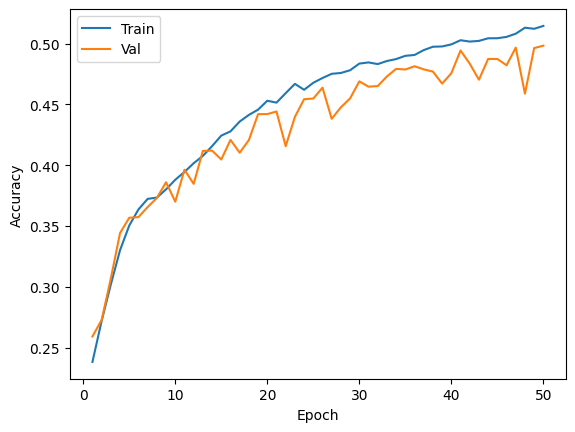

In [9]:
PlotGraph(Epoch_List, TrainAcc_List, ValAcc_List)

In [10]:

model = AllConv_IOCN(10).to(device)
for name, param in model.named_parameters():
    print(name)

Conv1.weight
Conv1.bias
Conv2.weight
Conv2.bias
Conv3.weight
Conv3.bias
Conv4.weight
Conv4.bias
Conv5.weight
Conv5.bias


In [11]:
# -------------------------------------------- CIFAR-100 Dataset -----------------------------------------------------------
Option = 6
Train_DataLoader, Val_DataLoader, Test_DataLoader = CreateDataLoaders(Option, 64)
ModelName = "Model_AllConv_IOCN_CIFAR100.pt"

model = AllConv_IOCN(100).to(device)
loss_criteria = nn.CrossEntropyLoss()
AdamOpt = torch.optim.Adam(model.parameters(), lr=0.0001)

ValAccuracy = 0
TrainAcc_List = []
ValAcc_List = []

saved = False
if saved == True:
    saved_model = torch.load(ModelName, map_location=torch.device('cpu')).to(device)
else:
    model.train()
    Train_Accuracy = 0

    for e in range(EPOCHS):
        Train_Accuracy = TrainModel(model, loss_criteria, AdamOpt, device, Train_DataLoader)
        val_acc = EvaluateModel(model, Val_DataLoader, device)

        TrainAcc_List.append(Train_Accuracy.cpu().item())
        ValAcc_List.append(val_acc.cpu().item())

        print("EPOCH - ", e+1, ". Train Accuracy = ", Train_Accuracy.cpu().item(), ", Validation Accuracy = ", val_acc.cpu().item())
        
        if val_acc.cpu().item() > ValAccuracy:
            print("Model Re-Saved")
            ValAccuracy = val_acc.cpu().item()
            torch.save(model, ModelName)

    saved_model = torch.load(ModelName, map_location=torch.device('cpu')).to(device)


print()

Train_Accuracy = EvaluateModel(saved_model, Train_DataLoader, device)
print("Train Accuracy = ", Train_Accuracy.cpu().item())
Test_Accuracy = EvaluateModel(saved_model, Test_DataLoader, device)
print("Test Accuracy = ", Test_Accuracy.cpu().item())

print("Generalization Gap = ", (Train_Accuracy.cpu().item() - Test_Accuracy.cpu().item()))

100%|██████████| 169001437/169001437 [00:05<00:00, 29614307.01it/s]


Extracting ./cifar-100-python.tar.gz to ./
Files already downloaded and verified


100%|██████████| 118/118 [00:01<00:00, 92.83it/s]


EPOCH -  1 . Train Accuracy =  0.024658823385834694 , Validation Accuracy =  0.03293333202600479
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 69.11it/s]


EPOCH -  2 . Train Accuracy =  0.04047058895230293 , Validation Accuracy =  0.04360000044107437
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.88it/s]


EPOCH -  3 . Train Accuracy =  0.050023529678583145 , Validation Accuracy =  0.04546666890382767
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 94.35it/s]


EPOCH -  4 . Train Accuracy =  0.053341176360845566 , Validation Accuracy =  0.0536000020802021
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 95.85it/s]


EPOCH -  5 . Train Accuracy =  0.058047059923410416 , Validation Accuracy =  0.06240000203251839
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 96.00it/s]


EPOCH -  6 . Train Accuracy =  0.0625411793589592 , Validation Accuracy =  0.06320000439882278
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 88.83it/s]


EPOCH -  7 . Train Accuracy =  0.06920000165700912 , Validation Accuracy =  0.06826666742563248
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 74.79it/s]


EPOCH -  8 . Train Accuracy =  0.07298823446035385 , Validation Accuracy =  0.06613333523273468


100%|██████████| 118/118 [00:01<00:00, 93.62it/s]


EPOCH -  9 . Train Accuracy =  0.07823529094457626 , Validation Accuracy =  0.08186666667461395
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.80it/s]


EPOCH -  10 . Train Accuracy =  0.08501176536083221 , Validation Accuracy =  0.08479999750852585
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.89it/s]


EPOCH -  11 . Train Accuracy =  0.09239999949932098 , Validation Accuracy =  0.09426666796207428
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.53it/s]


EPOCH -  12 . Train Accuracy =  0.09825882315635681 , Validation Accuracy =  0.09600000083446503
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 82.44it/s]


EPOCH -  13 . Train Accuracy =  0.10327059030532837 , Validation Accuracy =  0.10533333569765091
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 76.09it/s]


EPOCH -  14 . Train Accuracy =  0.10644705593585968 , Validation Accuracy =  0.10199999809265137


100%|██████████| 118/118 [00:01<00:00, 94.48it/s]


EPOCH -  15 . Train Accuracy =  0.10814117640256882 , Validation Accuracy =  0.10266666859388351


100%|██████████| 118/118 [00:01<00:00, 94.46it/s]


EPOCH -  16 . Train Accuracy =  0.11011764407157898 , Validation Accuracy =  0.10493333637714386


100%|██████████| 118/118 [00:01<00:00, 94.06it/s]


EPOCH -  17 . Train Accuracy =  0.11404705792665482 , Validation Accuracy =  0.11133333295583725
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.15it/s]


EPOCH -  18 . Train Accuracy =  0.11729411780834198 , Validation Accuracy =  0.11320000141859055
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.50it/s]


EPOCH -  19 . Train Accuracy =  0.11851764470338821 , Validation Accuracy =  0.12000000476837158
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 68.09it/s]


EPOCH -  20 . Train Accuracy =  0.11898823827505112 , Validation Accuracy =  0.11720000207424164


100%|██████████| 118/118 [00:01<00:00, 94.88it/s]


EPOCH -  21 . Train Accuracy =  0.12232941389083862 , Validation Accuracy =  0.11733333766460419


100%|██████████| 118/118 [00:01<00:00, 94.90it/s]


EPOCH -  22 . Train Accuracy =  0.12437646836042404 , Validation Accuracy =  0.12280000001192093
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 94.81it/s]


EPOCH -  23 . Train Accuracy =  0.12691764533519745 , Validation Accuracy =  0.12333333492279053
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 94.24it/s]


EPOCH -  24 . Train Accuracy =  0.1285882294178009 , Validation Accuracy =  0.12680000066757202
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 88.86it/s]


EPOCH -  25 . Train Accuracy =  0.1312941163778305 , Validation Accuracy =  0.12200000137090683


100%|██████████| 118/118 [00:01<00:00, 70.34it/s]


EPOCH -  26 . Train Accuracy =  0.13199999928474426 , Validation Accuracy =  0.12533333897590637


100%|██████████| 118/118 [00:01<00:00, 94.24it/s]


EPOCH -  27 . Train Accuracy =  0.13548235595226288 , Validation Accuracy =  0.12626667320728302


100%|██████████| 118/118 [00:01<00:00, 93.85it/s]


EPOCH -  28 . Train Accuracy =  0.13588234782218933 , Validation Accuracy =  0.12480000406503677


100%|██████████| 118/118 [00:01<00:00, 94.87it/s]


EPOCH -  29 . Train Accuracy =  0.13858823478221893 , Validation Accuracy =  0.14133334159851074
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.61it/s]


EPOCH -  30 . Train Accuracy =  0.14051765203475952 , Validation Accuracy =  0.13493333756923676


100%|██████████| 118/118 [00:01<00:00, 91.67it/s]


EPOCH -  31 . Train Accuracy =  0.14482353627681732 , Validation Accuracy =  0.13653333485126495


100%|██████████| 118/118 [00:01<00:00, 68.62it/s]


EPOCH -  32 . Train Accuracy =  0.14745882153511047 , Validation Accuracy =  0.140666663646698


100%|██████████| 118/118 [00:01<00:00, 94.62it/s]


EPOCH -  33 . Train Accuracy =  0.15000000596046448 , Validation Accuracy =  0.14560000598430634
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.63it/s]


EPOCH -  34 . Train Accuracy =  0.15007059276103973 , Validation Accuracy =  0.14373333752155304


100%|██████████| 118/118 [00:01<00:00, 95.09it/s]


EPOCH -  35 . Train Accuracy =  0.152188241481781 , Validation Accuracy =  0.15080000460147858
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.06it/s]


EPOCH -  36 . Train Accuracy =  0.15472941100597382 , Validation Accuracy =  0.14800000190734863


100%|██████████| 118/118 [00:01<00:00, 90.36it/s]


EPOCH -  37 . Train Accuracy =  0.1587529480457306 , Validation Accuracy =  0.14640000462532043


100%|██████████| 118/118 [00:01<00:00, 67.94it/s]


EPOCH -  38 . Train Accuracy =  0.1587529480457306 , Validation Accuracy =  0.147599995136261


100%|██████████| 118/118 [00:01<00:00, 92.92it/s]


EPOCH -  39 . Train Accuracy =  0.15814118087291718 , Validation Accuracy =  0.15199999511241913
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.02it/s]


EPOCH -  40 . Train Accuracy =  0.15950588881969452 , Validation Accuracy =  0.15440000593662262
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.57it/s]


EPOCH -  41 . Train Accuracy =  0.16204705834388733 , Validation Accuracy =  0.15280000865459442


100%|██████████| 118/118 [00:01<00:00, 89.89it/s]


EPOCH -  42 . Train Accuracy =  0.16359999775886536 , Validation Accuracy =  0.15333333611488342


100%|██████████| 118/118 [00:01<00:00, 92.83it/s]


EPOCH -  43 . Train Accuracy =  0.16494117677211761 , Validation Accuracy =  0.15706667304039001
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 65.44it/s]


EPOCH -  44 . Train Accuracy =  0.16536471247673035 , Validation Accuracy =  0.1594666689634323
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 94.19it/s]


EPOCH -  45 . Train Accuracy =  0.1668705940246582 , Validation Accuracy =  0.1599999964237213
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 96.34it/s]


EPOCH -  46 . Train Accuracy =  0.16712941229343414 , Validation Accuracy =  0.15880000591278076


100%|██████████| 118/118 [00:01<00:00, 93.76it/s]


EPOCH -  47 . Train Accuracy =  0.16981177031993866 , Validation Accuracy =  0.16386666893959045
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.93it/s]


EPOCH -  48 . Train Accuracy =  0.1692705899477005 , Validation Accuracy =  0.1616000086069107


100%|██████████| 118/118 [00:01<00:00, 93.63it/s]


EPOCH -  49 . Train Accuracy =  0.1718352884054184 , Validation Accuracy =  0.1613333374261856


100%|██████████| 118/118 [00:01<00:00, 67.22it/s]


EPOCH -  50 . Train Accuracy =  0.17176470160484314 , Validation Accuracy =  0.16120000183582306



100%|██████████| 665/665 [00:07<00:00, 89.90it/s]


Train Accuracy =  0.1724705845117569


100%|██████████| 157/157 [00:01<00:00, 93.75it/s]

Test Accuracy =  0.1639999896287918
Generalization Gap =  0.008470594882965088


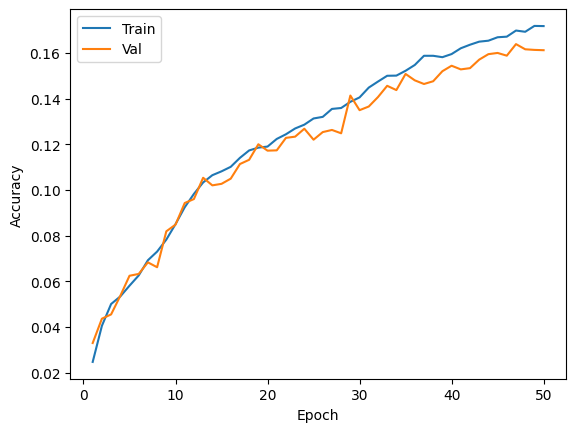

In [12]:
PlotGraph(Epoch_List, TrainAcc_List, ValAcc_List)

In [13]:
# -------------------------------------------- CIFAR-10 Dataset with 20% Randomness -----------------------------------------------------------
Option = 7
Train_DataLoader, Val_DataLoader, Test_DataLoader = CreateDataLoaders(Option, 64, RandomNoisePerc=0.2)
ModelName = "Model_AllConv_IOCN_CIFAR10_R20.pt"

model = AllConv_IOCN(10).to(device)
loss_criteria = nn.CrossEntropyLoss()
AdamOpt = torch.optim.Adam(model.parameters(), lr=0.0001)

ValAccuracy = 0
TrainAcc_List = []
ValAcc_List = []

saved = False
if saved == True:
    saved_model = torch.load(ModelName, map_location=torch.device('cpu')).to(device)
else:
    model.train()
    Train_Accuracy = 0

    for e in range(EPOCHS):
        Train_Accuracy = TrainModel(model, loss_criteria, AdamOpt, device, Train_DataLoader)
        val_acc = EvaluateModel(model, Val_DataLoader, device)

        TrainAcc_List.append(Train_Accuracy.cpu().item())
        ValAcc_List.append(val_acc.cpu().item())

        print("EPOCH - ", e+1, ". Train Accuracy = ", Train_Accuracy.cpu().item(), ", Validation Accuracy = ", val_acc.cpu().item())
        
        if val_acc.cpu().item() > ValAccuracy:
            print("Model Re-Saved")
            ValAccuracy = val_acc.cpu().item()
            torch.save(model, ModelName)

    saved_model = torch.load(ModelName, map_location=torch.device('cpu')).to(device)


print()

Train_Accuracy = EvaluateModel(saved_model, Train_DataLoader, device)
print("Train Accuracy = ", Train_Accuracy.cpu().item())
Test_Accuracy = EvaluateModel(saved_model, Test_DataLoader, device)
print("Test Accuracy = ", Test_Accuracy.cpu().item())

print("Generalization Gap = ", (Train_Accuracy.cpu().item() - Test_Accuracy.cpu().item()))

Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 118/118 [00:01<00:00, 93.02it/s]


EPOCH -  1 . Train Accuracy =  0.10105882585048676 , Validation Accuracy =  0.15706667304039001
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 91.29it/s]


EPOCH -  2 . Train Accuracy =  0.23129412531852722 , Validation Accuracy =  0.249466672539711
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.58it/s]


EPOCH -  3 . Train Accuracy =  0.2667294144630432 , Validation Accuracy =  0.28066667914390564
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.78it/s]


EPOCH -  4 . Train Accuracy =  0.27654117345809937 , Validation Accuracy =  0.2768000066280365


100%|██████████| 118/118 [00:01<00:00, 81.48it/s]


EPOCH -  5 . Train Accuracy =  0.28934118151664734 , Validation Accuracy =  0.3086666762828827
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 68.98it/s]


EPOCH -  6 . Train Accuracy =  0.3115294277667999 , Validation Accuracy =  0.3179999887943268
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.49it/s]


EPOCH -  7 . Train Accuracy =  0.3224470615386963 , Validation Accuracy =  0.3097333312034607


100%|██████████| 118/118 [00:01<00:00, 91.97it/s]


EPOCH -  8 . Train Accuracy =  0.3312235176563263 , Validation Accuracy =  0.3322666585445404
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.50it/s]


EPOCH -  9 . Train Accuracy =  0.33637645840644836 , Validation Accuracy =  0.340800017118454
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.10it/s]


EPOCH -  10 . Train Accuracy =  0.3411058783531189 , Validation Accuracy =  0.3391999900341034


100%|██████████| 118/118 [00:01<00:00, 94.37it/s]


EPOCH -  11 . Train Accuracy =  0.34261175990104675 , Validation Accuracy =  0.3437333405017853
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 65.88it/s]


EPOCH -  12 . Train Accuracy =  0.34865882992744446 , Validation Accuracy =  0.3492000102996826
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.45it/s]


EPOCH -  13 . Train Accuracy =  0.3517647087574005 , Validation Accuracy =  0.3502666652202606
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.67it/s]


EPOCH -  14 . Train Accuracy =  0.3594588339328766 , Validation Accuracy =  0.35733333230018616
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 95.32it/s]


EPOCH -  15 . Train Accuracy =  0.3637882471084595 , Validation Accuracy =  0.35893332958221436
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 91.78it/s]


EPOCH -  16 . Train Accuracy =  0.36731764674186707 , Validation Accuracy =  0.3675999939441681
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.49it/s]


EPOCH -  17 . Train Accuracy =  0.37407058477401733 , Validation Accuracy =  0.36853334307670593
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 63.77it/s]


EPOCH -  18 . Train Accuracy =  0.3771294057369232 , Validation Accuracy =  0.37426668405532837
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 94.62it/s]


EPOCH -  19 . Train Accuracy =  0.3819058835506439 , Validation Accuracy =  0.37906667590141296
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 94.60it/s]


EPOCH -  20 . Train Accuracy =  0.3817882239818573 , Validation Accuracy =  0.37906667590141296


100%|██████████| 118/118 [00:01<00:00, 93.13it/s]


EPOCH -  21 . Train Accuracy =  0.38458824157714844 , Validation Accuracy =  0.3840000033378601
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 94.19it/s]


EPOCH -  22 . Train Accuracy =  0.38696470856666565 , Validation Accuracy =  0.38840001821517944
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 94.08it/s]


EPOCH -  23 . Train Accuracy =  0.39028236269950867 , Validation Accuracy =  0.38786667585372925


100%|██████████| 118/118 [00:01<00:00, 65.88it/s]


EPOCH -  24 . Train Accuracy =  0.39207059144973755 , Validation Accuracy =  0.3890666663646698
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 86.50it/s]


EPOCH -  25 . Train Accuracy =  0.3934352993965149 , Validation Accuracy =  0.3936000168323517
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.46it/s]


EPOCH -  26 . Train Accuracy =  0.396329402923584 , Validation Accuracy =  0.39026665687561035


100%|██████████| 118/118 [00:01<00:00, 92.83it/s]


EPOCH -  27 . Train Accuracy =  0.3990117609500885 , Validation Accuracy =  0.3925333321094513


100%|██████████| 118/118 [00:01<00:00, 95.14it/s]


EPOCH -  28 . Train Accuracy =  0.3974588215351105 , Validation Accuracy =  0.38733333349227905


100%|██████████| 118/118 [00:01<00:00, 94.47it/s]


EPOCH -  29 . Train Accuracy =  0.4020000100135803 , Validation Accuracy =  0.39533334970474243
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 65.98it/s]


EPOCH -  30 . Train Accuracy =  0.401411771774292 , Validation Accuracy =  0.3986666798591614
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 87.06it/s]


EPOCH -  31 . Train Accuracy =  0.4041176438331604 , Validation Accuracy =  0.3997333347797394
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 94.05it/s]


EPOCH -  32 . Train Accuracy =  0.4053647220134735 , Validation Accuracy =  0.39666667580604553


100%|██████████| 118/118 [00:01<00:00, 92.71it/s]


EPOCH -  33 . Train Accuracy =  0.4068470597267151 , Validation Accuracy =  0.40093332529067993
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.79it/s]


EPOCH -  34 . Train Accuracy =  0.40981176495552063 , Validation Accuracy =  0.3989333510398865


100%|██████████| 118/118 [00:01<00:00, 93.28it/s]


EPOCH -  35 . Train Accuracy =  0.40974119305610657 , Validation Accuracy =  0.4036000072956085
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 64.62it/s]


EPOCH -  36 . Train Accuracy =  0.4134117662906647 , Validation Accuracy =  0.4047999978065491
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.80it/s]


EPOCH -  37 . Train Accuracy =  0.4138588309288025 , Validation Accuracy =  0.41013333201408386
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 94.40it/s]


EPOCH -  38 . Train Accuracy =  0.41454118490219116 , Validation Accuracy =  0.4124000072479248
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.90it/s]


EPOCH -  39 . Train Accuracy =  0.41663530468940735 , Validation Accuracy =  0.40960001945495605


100%|██████████| 118/118 [00:01<00:00, 93.15it/s]


EPOCH -  40 . Train Accuracy =  0.42030587792396545 , Validation Accuracy =  0.41066667437553406


100%|██████████| 118/118 [00:01<00:00, 91.26it/s]


EPOCH -  41 . Train Accuracy =  0.42000001668930054 , Validation Accuracy =  0.415066659450531
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 68.70it/s]


EPOCH -  42 . Train Accuracy =  0.41856470704078674 , Validation Accuracy =  0.41226667165756226


100%|██████████| 118/118 [00:01<00:00, 93.18it/s]


EPOCH -  43 . Train Accuracy =  0.4247294068336487 , Validation Accuracy =  0.41226667165756226


100%|██████████| 118/118 [00:01<00:00, 94.62it/s]


EPOCH -  44 . Train Accuracy =  0.42491763830184937 , Validation Accuracy =  0.41653335094451904
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.62it/s]


EPOCH -  45 . Train Accuracy =  0.427364706993103 , Validation Accuracy =  0.41946667432785034
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.23it/s]


EPOCH -  46 . Train Accuracy =  0.4305647015571594 , Validation Accuracy =  0.4222666621208191
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.39it/s]


EPOCH -  47 . Train Accuracy =  0.43211764097213745 , Validation Accuracy =  0.4164000153541565


100%|██████████| 118/118 [00:01<00:00, 71.00it/s]


EPOCH -  48 . Train Accuracy =  0.4322117567062378 , Validation Accuracy =  0.42506667971611023
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 85.80it/s]


EPOCH -  49 . Train Accuracy =  0.43576470017433167 , Validation Accuracy =  0.4270666837692261
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 91.33it/s]


EPOCH -  50 . Train Accuracy =  0.4371058940887451 , Validation Accuracy =  0.42186668515205383



100%|██████████| 665/665 [00:07<00:00, 84.87it/s]


Train Accuracy =  0.4353411793708801


100%|██████████| 157/157 [00:01<00:00, 95.98it/s]

Test Accuracy =  0.43129998445510864
Generalization Gap =  0.004041194915771484


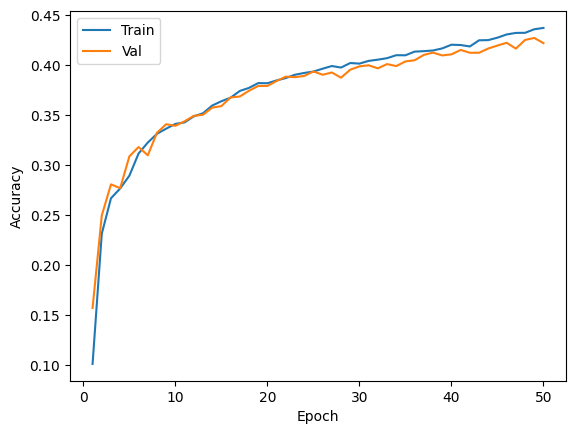

In [14]:
PlotGraph(Epoch_List, TrainAcc_List, ValAcc_List)

In [15]:
# -------------------------------------------- CIFAR-10 Dataset with 40% Randomness -----------------------------------------------------------
Option = 7
Train_DataLoader, Val_DataLoader, Test_DataLoader = CreateDataLoaders(Option, 64, RandomNoisePerc=0.4)
ModelName = "Model_AllConv_IOCN_CIFAR10_R40.pt"

model = AllConv_IOCN(10).to(device)
loss_criteria = nn.CrossEntropyLoss()
AdamOpt = torch.optim.Adam(model.parameters(), lr=0.0001)

ValAccuracy = 0
TrainAcc_List = []
ValAcc_List = []

saved = False
if saved == True:
    saved_model = torch.load(ModelName, map_location=torch.device('cpu')).to(device)
else:
    model.train()
    Train_Accuracy = 0

    for e in range(EPOCHS):
        Train_Accuracy = TrainModel(model, loss_criteria, AdamOpt, device, Train_DataLoader)
        val_acc = EvaluateModel(model, Val_DataLoader, device)

        TrainAcc_List.append(Train_Accuracy.cpu().item())
        ValAcc_List.append(val_acc.cpu().item())

        print("EPOCH - ", e+1, ". Train Accuracy = ", Train_Accuracy.cpu().item(), ", Validation Accuracy = ", val_acc.cpu().item())
        
        if val_acc.cpu().item() > ValAccuracy:
            print("Model Re-Saved")
            ValAccuracy = val_acc.cpu().item()
            torch.save(model, ModelName)

    saved_model = torch.load(ModelName, map_location=torch.device('cpu')).to(device)


print()

Train_Accuracy = EvaluateModel(saved_model, Train_DataLoader, device)
print("Train Accuracy = ", Train_Accuracy.cpu().item())
Test_Accuracy = EvaluateModel(saved_model, Test_DataLoader, device)
print("Test Accuracy = ", Test_Accuracy.cpu().item())

print("Generalization Gap = ", (Train_Accuracy.cpu().item() - Test_Accuracy.cpu().item()))

Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 118/118 [00:01<00:00, 93.73it/s]


EPOCH -  1 . Train Accuracy =  0.12967059016227722 , Validation Accuracy =  0.21880000829696655
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 87.85it/s]


EPOCH -  2 . Train Accuracy =  0.2390117645263672 , Validation Accuracy =  0.23626667261123657
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.66it/s]


EPOCH -  3 . Train Accuracy =  0.24955295026302338 , Validation Accuracy =  0.2534666657447815
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 65.79it/s]


EPOCH -  4 . Train Accuracy =  0.2591058909893036 , Validation Accuracy =  0.25573334097862244
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.09it/s]


EPOCH -  5 . Train Accuracy =  0.27096471190452576 , Validation Accuracy =  0.273333340883255
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.43it/s]


EPOCH -  6 . Train Accuracy =  0.279976487159729 , Validation Accuracy =  0.273333340883255


100%|██████████| 118/118 [00:01<00:00, 92.62it/s]


EPOCH -  7 . Train Accuracy =  0.2901647090911865 , Validation Accuracy =  0.2866666615009308
Model Re-Saved


100%|██████████| 118/118 [00:03<00:00, 36.00it/s]


EPOCH -  8 . Train Accuracy =  0.30204707384109497 , Validation Accuracy =  0.2937333285808563
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.00it/s]


EPOCH -  9 . Train Accuracy =  0.3060235381126404 , Validation Accuracy =  0.30346667766571045
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 87.19it/s]


EPOCH -  10 . Train Accuracy =  0.314423531293869 , Validation Accuracy =  0.3102666735649109
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 95.94it/s]


EPOCH -  11 . Train Accuracy =  0.31757646799087524 , Validation Accuracy =  0.3129333257675171
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 79.18it/s]


EPOCH -  12 . Train Accuracy =  0.32254117727279663 , Validation Accuracy =  0.3150666654109955
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 80.11it/s]


EPOCH -  13 . Train Accuracy =  0.32778823375701904 , Validation Accuracy =  0.3147999942302704


100%|██████████| 118/118 [00:01<00:00, 95.15it/s]


EPOCH -  14 . Train Accuracy =  0.3286823630332947 , Validation Accuracy =  0.3199999928474426
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 95.90it/s]


EPOCH -  15 . Train Accuracy =  0.332682341337204 , Validation Accuracy =  0.31960001587867737


100%|██████████| 118/118 [00:01<00:00, 92.42it/s]


EPOCH -  16 . Train Accuracy =  0.3332470655441284 , Validation Accuracy =  0.3296000063419342
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.44it/s]


EPOCH -  17 . Train Accuracy =  0.33637645840644836 , Validation Accuracy =  0.33239999413490295
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.45it/s]


EPOCH -  18 . Train Accuracy =  0.3389882445335388 , Validation Accuracy =  0.3394666612148285
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 65.98it/s]


EPOCH -  19 . Train Accuracy =  0.3404470682144165 , Validation Accuracy =  0.33933332562446594


100%|██████████| 118/118 [00:01<00:00, 94.95it/s]


EPOCH -  20 . Train Accuracy =  0.34084707498550415 , Validation Accuracy =  0.34306666254997253
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.93it/s]


EPOCH -  21 . Train Accuracy =  0.3455294072628021 , Validation Accuracy =  0.3394666612148285


100%|██████████| 118/118 [00:01<00:00, 95.64it/s]


EPOCH -  22 . Train Accuracy =  0.3471529483795166 , Validation Accuracy =  0.33799999952316284


100%|██████████| 118/118 [00:01<00:00, 91.83it/s]


EPOCH -  23 . Train Accuracy =  0.3491058945655823 , Validation Accuracy =  0.34613335132598877
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.93it/s]


EPOCH -  24 . Train Accuracy =  0.3509882390499115 , Validation Accuracy =  0.34653332829475403
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 66.63it/s]


EPOCH -  25 . Train Accuracy =  0.3527764678001404 , Validation Accuracy =  0.3510666787624359
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.33it/s]


EPOCH -  26 . Train Accuracy =  0.35345882177352905 , Validation Accuracy =  0.35333332419395447
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.88it/s]


EPOCH -  27 . Train Accuracy =  0.358352929353714 , Validation Accuracy =  0.35333332419395447


100%|██████████| 118/118 [00:01<00:00, 94.07it/s]


EPOCH -  28 . Train Accuracy =  0.3567529320716858 , Validation Accuracy =  0.34173333644866943


100%|██████████| 118/118 [00:01<00:00, 92.25it/s]


EPOCH -  29 . Train Accuracy =  0.35985884070396423 , Validation Accuracy =  0.35893332958221436
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.58it/s]


EPOCH -  30 . Train Accuracy =  0.3623529374599457 , Validation Accuracy =  0.3558666706085205


100%|██████████| 118/118 [00:01<00:00, 62.44it/s]


EPOCH -  31 . Train Accuracy =  0.36334118247032166 , Validation Accuracy =  0.35386666655540466


100%|██████████| 118/118 [00:01<00:00, 93.39it/s]


EPOCH -  32 . Train Accuracy =  0.3645882308483124 , Validation Accuracy =  0.3601333498954773
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 91.59it/s]


EPOCH -  33 . Train Accuracy =  0.364423543214798 , Validation Accuracy =  0.3571999967098236


100%|██████████| 118/118 [00:01<00:00, 93.52it/s]


EPOCH -  34 . Train Accuracy =  0.3674117624759674 , Validation Accuracy =  0.366266667842865
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.24it/s]


EPOCH -  35 . Train Accuracy =  0.3680470585823059 , Validation Accuracy =  0.3628000020980835


100%|██████████| 118/118 [00:01<00:00, 93.59it/s]


EPOCH -  36 . Train Accuracy =  0.3677411675453186 , Validation Accuracy =  0.3622666597366333


100%|██████████| 118/118 [00:01<00:00, 69.31it/s]


EPOCH -  37 . Train Accuracy =  0.37037646770477295 , Validation Accuracy =  0.3665333390235901
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 82.98it/s]


EPOCH -  38 . Train Accuracy =  0.37117648124694824 , Validation Accuracy =  0.359333336353302


100%|██████████| 118/118 [00:01<00:00, 92.27it/s]


EPOCH -  39 . Train Accuracy =  0.3719058930873871 , Validation Accuracy =  0.37040001153945923
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 90.36it/s]


EPOCH -  40 . Train Accuracy =  0.3746353089809418 , Validation Accuracy =  0.3737333416938782
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 90.84it/s]


EPOCH -  41 . Train Accuracy =  0.3736470639705658 , Validation Accuracy =  0.3754666745662689
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.41it/s]


EPOCH -  42 . Train Accuracy =  0.37609413266181946 , Validation Accuracy =  0.3713333308696747


100%|██████████| 118/118 [00:01<00:00, 91.88it/s]


EPOCH -  43 . Train Accuracy =  0.3750823438167572 , Validation Accuracy =  0.37853333353996277
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 65.54it/s]


EPOCH -  44 . Train Accuracy =  0.37757647037506104 , Validation Accuracy =  0.37466666102409363


100%|██████████| 118/118 [00:01<00:00, 91.19it/s]


EPOCH -  45 . Train Accuracy =  0.37910589575767517 , Validation Accuracy =  0.38066667318344116
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 90.94it/s]


EPOCH -  46 . Train Accuracy =  0.3787764608860016 , Validation Accuracy =  0.3734666705131531


100%|██████████| 118/118 [00:01<00:00, 91.17it/s]


EPOCH -  47 . Train Accuracy =  0.3801882266998291 , Validation Accuracy =  0.3765333294868469


100%|██████████| 118/118 [00:01<00:00, 92.95it/s]


EPOCH -  48 . Train Accuracy =  0.38152942061424255 , Validation Accuracy =  0.37560001015663147


100%|██████████| 118/118 [00:01<00:00, 89.81it/s]


EPOCH -  49 . Train Accuracy =  0.38007059693336487 , Validation Accuracy =  0.38066667318344116


100%|██████████| 118/118 [00:01<00:00, 92.06it/s]


EPOCH -  50 . Train Accuracy =  0.38110587000846863 , Validation Accuracy =  0.38440001010894775
Model Re-Saved



100%|██████████| 665/665 [00:07<00:00, 91.66it/s]


Train Accuracy =  0.38484707474708557


100%|██████████| 157/157 [00:01<00:00, 82.44it/s]

Test Accuracy =  0.37860000133514404
Generalization Gap =  0.006247073411941528


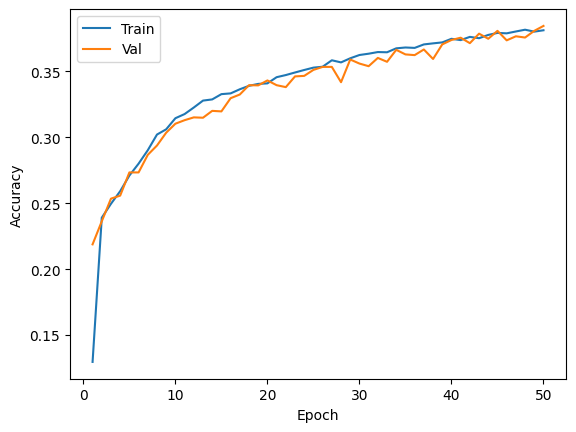

In [16]:
PlotGraph(Epoch_List, TrainAcc_List, ValAcc_List)

In [17]:
# -------------------------------------------- CIFAR-10 Dataset with 60% Randomness -----------------------------------------------------------
Option = 7
Train_DataLoader, Val_DataLoader, Test_DataLoader = CreateDataLoaders(Option, 64, RandomNoisePerc=0.6)
ModelName = "Model_AllConv_IOCN_CIFAR10_R60.pt"

model = AllConv_IOCN(10).to(device)
loss_criteria = nn.CrossEntropyLoss()
AdamOpt = torch.optim.Adam(model.parameters(), lr=0.0001)

ValAccuracy = 0
TrainAcc_List = []
ValAcc_List = []

saved = False
if saved == True:
    saved_model = torch.load(ModelName, map_location=torch.device('cpu')).to(device)
else:
    model.train()
    Train_Accuracy = 0

    for e in range(EPOCHS):
        Train_Accuracy = TrainModel(model, loss_criteria, AdamOpt, device, Train_DataLoader)
        val_acc = EvaluateModel(model, Val_DataLoader, device)

        TrainAcc_List.append(Train_Accuracy.cpu().item())
        ValAcc_List.append(val_acc.cpu().item())

        print("EPOCH - ", e+1, ". Train Accuracy = ", Train_Accuracy.cpu().item(), ", Validation Accuracy = ", val_acc.cpu().item())
        
        if val_acc.cpu().item() > ValAccuracy:
            print("Model Re-Saved")
            ValAccuracy = val_acc.cpu().item()
            torch.save(model, ModelName)

    saved_model = torch.load(ModelName, map_location=torch.device('cpu')).to(device)


print()

Train_Accuracy = EvaluateModel(saved_model, Train_DataLoader, device)
print("Train Accuracy = ", Train_Accuracy.cpu().item())
Test_Accuracy = EvaluateModel(saved_model, Test_DataLoader, device)
print("Test Accuracy = ", Test_Accuracy.cpu().item())

print("Generalization Gap = ", (Train_Accuracy.cpu().item() - Test_Accuracy.cpu().item()))

Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 118/118 [00:01<00:00, 69.85it/s]


EPOCH -  1 . Train Accuracy =  0.1773882359266281 , Validation Accuracy =  0.24533332884311676
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.47it/s]


EPOCH -  2 . Train Accuracy =  0.24625882506370544 , Validation Accuracy =  0.2476000040769577
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.03it/s]


EPOCH -  3 . Train Accuracy =  0.2527294158935547 , Validation Accuracy =  0.25893333554267883
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.76it/s]


EPOCH -  4 . Train Accuracy =  0.26317647099494934 , Validation Accuracy =  0.2669333219528198
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.79it/s]


EPOCH -  5 . Train Accuracy =  0.2710588276386261 , Validation Accuracy =  0.27453333139419556
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.88it/s]


EPOCH -  6 . Train Accuracy =  0.2766117751598358 , Validation Accuracy =  0.287200003862381
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 66.46it/s]


EPOCH -  7 . Train Accuracy =  0.2844941318035126 , Validation Accuracy =  0.2950666844844818
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.80it/s]


EPOCH -  8 . Train Accuracy =  0.2953176498413086 , Validation Accuracy =  0.2982666790485382
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 95.14it/s]


EPOCH -  9 . Train Accuracy =  0.30082353949546814 , Validation Accuracy =  0.3043999969959259
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.16it/s]


EPOCH -  10 . Train Accuracy =  0.3088941276073456 , Validation Accuracy =  0.3091999888420105
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 91.90it/s]


EPOCH -  11 . Train Accuracy =  0.31216469407081604 , Validation Accuracy =  0.31040000915527344
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 86.11it/s]


EPOCH -  12 . Train Accuracy =  0.3200470507144928 , Validation Accuracy =  0.3144000172615051
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 81.92it/s]


EPOCH -  13 . Train Accuracy =  0.3296470642089844 , Validation Accuracy =  0.32093334197998047
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 66.92it/s]


EPOCH -  14 . Train Accuracy =  0.33769410848617554 , Validation Accuracy =  0.33320000767707825
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 82.43it/s]


EPOCH -  15 . Train Accuracy =  0.34247058629989624 , Validation Accuracy =  0.3341333270072937
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.42it/s]


EPOCH -  16 . Train Accuracy =  0.3441411852836609 , Validation Accuracy =  0.3486666679382324
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 94.01it/s]


EPOCH -  17 . Train Accuracy =  0.3476470708847046 , Validation Accuracy =  0.3466666638851166


100%|██████████| 118/118 [00:01<00:00, 93.33it/s]


EPOCH -  18 . Train Accuracy =  0.351905882358551 , Validation Accuracy =  0.3502666652202606
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 89.44it/s]


EPOCH -  19 . Train Accuracy =  0.35694119334220886 , Validation Accuracy =  0.3508000075817108
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 76.01it/s]


EPOCH -  20 . Train Accuracy =  0.3589176535606384 , Validation Accuracy =  0.3566666841506958
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 84.22it/s]


EPOCH -  21 . Train Accuracy =  0.36254116892814636 , Validation Accuracy =  0.3505333364009857


100%|██████████| 118/118 [00:01<00:00, 89.72it/s]


EPOCH -  22 . Train Accuracy =  0.36800000071525574 , Validation Accuracy =  0.3537333309650421


100%|██████████| 118/118 [00:01<00:00, 95.84it/s]


EPOCH -  23 . Train Accuracy =  0.3684235215187073 , Validation Accuracy =  0.3598666787147522
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 94.43it/s]


EPOCH -  24 . Train Accuracy =  0.37275293469429016 , Validation Accuracy =  0.3601333498954773
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 88.17it/s]


EPOCH -  25 . Train Accuracy =  0.37402352690696716 , Validation Accuracy =  0.36559998989105225
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 79.85it/s]


EPOCH -  26 . Train Accuracy =  0.3742823600769043 , Validation Accuracy =  0.36773332953453064
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 78.58it/s]


EPOCH -  27 . Train Accuracy =  0.37454119324684143 , Validation Accuracy =  0.3548000156879425


100%|██████████| 118/118 [00:01<00:00, 87.25it/s]


EPOCH -  28 . Train Accuracy =  0.37729412317276 , Validation Accuracy =  0.3577333390712738


100%|██████████| 118/118 [00:01<00:00, 92.70it/s]


EPOCH -  29 . Train Accuracy =  0.37964707612991333 , Validation Accuracy =  0.3630666732788086


100%|██████████| 118/118 [00:01<00:00, 94.42it/s]


EPOCH -  30 . Train Accuracy =  0.38077646493911743 , Validation Accuracy =  0.36880001425743103
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.47it/s]


EPOCH -  31 . Train Accuracy =  0.3824235200881958 , Validation Accuracy =  0.3617333471775055


100%|██████████| 118/118 [00:01<00:00, 88.31it/s]


EPOCH -  32 . Train Accuracy =  0.3809411823749542 , Validation Accuracy =  0.3636000156402588


100%|██████████| 118/118 [00:01<00:00, 70.44it/s]


EPOCH -  33 . Train Accuracy =  0.38395294547080994 , Validation Accuracy =  0.37586668133735657
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 87.65it/s]


EPOCH -  34 . Train Accuracy =  0.3854117691516876 , Validation Accuracy =  0.3737333416938782


100%|██████████| 118/118 [00:01<00:00, 91.10it/s]


EPOCH -  35 . Train Accuracy =  0.386564701795578 , Validation Accuracy =  0.375733345746994


100%|██████████| 118/118 [00:01<00:00, 93.65it/s]


EPOCH -  36 . Train Accuracy =  0.3870353102684021 , Validation Accuracy =  0.3750666677951813


100%|██████████| 118/118 [00:01<00:00, 92.09it/s]


EPOCH -  37 . Train Accuracy =  0.3892470598220825 , Validation Accuracy =  0.38253334164619446
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.91it/s]


EPOCH -  38 . Train Accuracy =  0.38969412446022034 , Validation Accuracy =  0.3697333335876465


100%|██████████| 118/118 [00:01<00:00, 64.77it/s]


EPOCH -  39 . Train Accuracy =  0.3892941176891327 , Validation Accuracy =  0.37693333625793457


100%|██████████| 118/118 [00:01<00:00, 91.26it/s]


EPOCH -  40 . Train Accuracy =  0.39176470041275024 , Validation Accuracy =  0.37906667590141296


100%|██████████| 118/118 [00:01<00:00, 93.22it/s]


EPOCH -  41 . Train Accuracy =  0.39256471395492554 , Validation Accuracy =  0.38359999656677246
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.08it/s]


EPOCH -  42 . Train Accuracy =  0.39258822798728943 , Validation Accuracy =  0.3901333510875702
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 91.56it/s]


EPOCH -  43 . Train Accuracy =  0.3952941298484802 , Validation Accuracy =  0.3856000006198883


100%|██████████| 118/118 [00:01<00:00, 86.67it/s]


EPOCH -  44 . Train Accuracy =  0.39508235454559326 , Validation Accuracy =  0.38946667313575745


100%|██████████| 118/118 [00:01<00:00, 69.04it/s]


EPOCH -  45 . Train Accuracy =  0.39602354168891907 , Validation Accuracy =  0.3922666609287262
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 90.97it/s]


EPOCH -  46 . Train Accuracy =  0.3965647220611572 , Validation Accuracy =  0.38813334703445435


100%|██████████| 118/118 [00:01<00:00, 91.68it/s]


EPOCH -  47 . Train Accuracy =  0.39844706654548645 , Validation Accuracy =  0.39453333616256714
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.43it/s]


EPOCH -  48 . Train Accuracy =  0.3997647166252136 , Validation Accuracy =  0.4010666608810425
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 94.06it/s]


EPOCH -  49 . Train Accuracy =  0.4020235240459442 , Validation Accuracy =  0.3928000032901764


100%|██████████| 118/118 [00:01<00:00, 91.37it/s]


EPOCH -  50 . Train Accuracy =  0.4018823504447937 , Validation Accuracy =  0.3925333321094513



100%|██████████| 665/665 [00:07<00:00, 90.91it/s]


Train Accuracy =  0.4055529534816742


100%|██████████| 157/157 [00:02<00:00, 68.48it/s]

Test Accuracy =  0.40369999408721924
Generalization Gap =  0.001852959394454956


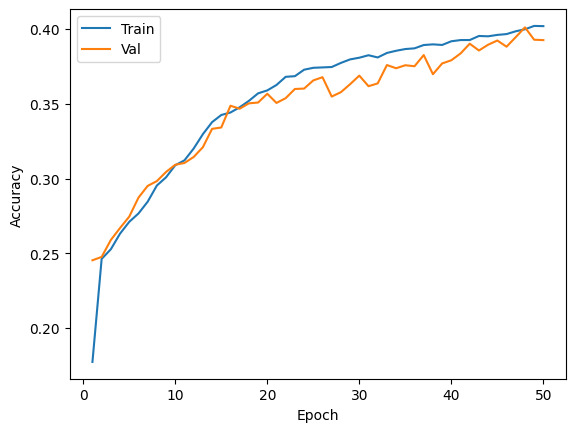

In [18]:
PlotGraph(Epoch_List, TrainAcc_List, ValAcc_List)

In [19]:
# -------------------------------------------- CIFAR-10 Dataset with 80% Randomness -----------------------------------------------------------
Option = 7
Train_DataLoader, Val_DataLoader, Test_DataLoader = CreateDataLoaders(Option, 64, RandomNoisePerc=0.8)
ModelName = "Model_AllConv_IOCN_CIFAR10_R80.pt"

model = AllConv_IOCN(10).to(device)
loss_criteria = nn.CrossEntropyLoss()
AdamOpt = torch.optim.Adam(model.parameters(), lr=0.0001)

ValAccuracy = 0
TrainAcc_List = []
ValAcc_List = []

saved = False
if saved == True:
    saved_model = torch.load(ModelName, map_location=torch.device('cpu')).to(device)
else:
    model.train()
    Train_Accuracy = 0

    for e in range(EPOCHS):
        Train_Accuracy = TrainModel(model, loss_criteria, AdamOpt, device, Train_DataLoader)
        val_acc = EvaluateModel(model, Val_DataLoader, device)

        TrainAcc_List.append(Train_Accuracy.cpu().item())
        ValAcc_List.append(val_acc.cpu().item())

        print("EPOCH - ", e+1, ". Train Accuracy = ", Train_Accuracy.cpu().item(), ", Validation Accuracy = ", val_acc.cpu().item())
        
        if val_acc.cpu().item() > ValAccuracy:
            print("Model Re-Saved")
            ValAccuracy = val_acc.cpu().item()
            torch.save(model, ModelName)

    saved_model = torch.load(ModelName, map_location=torch.device('cpu')).to(device)


print()

Train_Accuracy = EvaluateModel(saved_model, Train_DataLoader, device)
print("Train Accuracy = ", Train_Accuracy.cpu().item())
Test_Accuracy = EvaluateModel(saved_model, Test_DataLoader, device)
print("Test Accuracy = ", Test_Accuracy.cpu().item())

print("Generalization Gap = ", (Train_Accuracy.cpu().item() - Test_Accuracy.cpu().item()))

Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 118/118 [00:01<00:00, 64.29it/s]


EPOCH -  1 . Train Accuracy =  0.1724705845117569 , Validation Accuracy =  0.23706667125225067
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 91.96it/s]


EPOCH -  2 . Train Accuracy =  0.24343529343605042 , Validation Accuracy =  0.2617333233356476
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.84it/s]


EPOCH -  3 . Train Accuracy =  0.2572000026702881 , Validation Accuracy =  0.26733332872390747
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 89.73it/s]


EPOCH -  4 . Train Accuracy =  0.26670587062835693 , Validation Accuracy =  0.26919999718666077
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 94.69it/s]


EPOCH -  5 . Train Accuracy =  0.2769646942615509 , Validation Accuracy =  0.2752000093460083
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 89.95it/s]


EPOCH -  6 . Train Accuracy =  0.28997647762298584 , Validation Accuracy =  0.2948000133037567
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 73.48it/s]


EPOCH -  7 . Train Accuracy =  0.3036235272884369 , Validation Accuracy =  0.3027999997138977
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 71.61it/s]


EPOCH -  8 . Train Accuracy =  0.3157411813735962 , Validation Accuracy =  0.3229333460330963
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 90.13it/s]


EPOCH -  9 . Train Accuracy =  0.32731765508651733 , Validation Accuracy =  0.32973334193229675
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 90.71it/s]


EPOCH -  10 . Train Accuracy =  0.340588241815567 , Validation Accuracy =  0.3450666666030884
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 89.59it/s]


EPOCH -  11 . Train Accuracy =  0.34771764278411865 , Validation Accuracy =  0.33986666798591614


100%|██████████| 118/118 [00:01<00:00, 91.99it/s]


EPOCH -  12 . Train Accuracy =  0.35411766171455383 , Validation Accuracy =  0.3485333323478699
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 89.66it/s]


EPOCH -  13 . Train Accuracy =  0.3621882498264313 , Validation Accuracy =  0.34466665983200073


100%|██████████| 118/118 [00:01<00:00, 72.75it/s]


EPOCH -  14 . Train Accuracy =  0.3632705807685852 , Validation Accuracy =  0.35866665840148926
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 84.44it/s]


EPOCH -  15 . Train Accuracy =  0.36705881357192993 , Validation Accuracy =  0.35679998993873596


100%|██████████| 118/118 [00:01<00:00, 93.11it/s]


EPOCH -  16 . Train Accuracy =  0.3716000020503998 , Validation Accuracy =  0.36239999532699585
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.55it/s]


EPOCH -  17 . Train Accuracy =  0.3733176589012146 , Validation Accuracy =  0.3574666678905487


100%|██████████| 118/118 [00:01<00:00, 91.60it/s]


EPOCH -  18 . Train Accuracy =  0.37496471405029297 , Validation Accuracy =  0.36373335123062134
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 90.45it/s]


EPOCH -  19 . Train Accuracy =  0.37503528594970703 , Validation Accuracy =  0.36506667733192444
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.81it/s]


EPOCH -  20 . Train Accuracy =  0.3802117705345154 , Validation Accuracy =  0.3760000169277191
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 63.10it/s]


EPOCH -  21 . Train Accuracy =  0.38089412450790405 , Validation Accuracy =  0.366266667842865


100%|██████████| 118/118 [00:01<00:00, 91.30it/s]


EPOCH -  22 . Train Accuracy =  0.3822117745876312 , Validation Accuracy =  0.3722666800022125


100%|██████████| 118/118 [00:01<00:00, 84.46it/s]


EPOCH -  23 . Train Accuracy =  0.3844470679759979 , Validation Accuracy =  0.3691999912261963


100%|██████████| 118/118 [00:01<00:00, 90.82it/s]


EPOCH -  24 . Train Accuracy =  0.3868705928325653 , Validation Accuracy =  0.36693334579467773


100%|██████████| 118/118 [00:01<00:00, 92.10it/s]


EPOCH -  25 . Train Accuracy =  0.3848000168800354 , Validation Accuracy =  0.3815999925136566
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 91.89it/s]


EPOCH -  26 . Train Accuracy =  0.3878823518753052 , Validation Accuracy =  0.3729333281517029


100%|██████████| 118/118 [00:01<00:00, 76.55it/s]


EPOCH -  27 . Train Accuracy =  0.3917882442474365 , Validation Accuracy =  0.38386666774749756
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 81.61it/s]


EPOCH -  28 . Train Accuracy =  0.38922354578971863 , Validation Accuracy =  0.382666677236557


100%|██████████| 118/118 [00:01<00:00, 93.10it/s]


EPOCH -  29 . Train Accuracy =  0.39364707469940186 , Validation Accuracy =  0.39026665687561035
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 91.58it/s]


EPOCH -  30 . Train Accuracy =  0.3930588364601135 , Validation Accuracy =  0.38413333892822266


100%|██████████| 118/118 [00:01<00:00, 90.57it/s]


EPOCH -  31 . Train Accuracy =  0.3945176601409912 , Validation Accuracy =  0.38546666502952576


100%|██████████| 118/118 [00:01<00:00, 91.52it/s]


EPOCH -  32 . Train Accuracy =  0.39475294947624207 , Validation Accuracy =  0.38600000739097595


100%|██████████| 118/118 [00:01<00:00, 90.30it/s]


EPOCH -  33 . Train Accuracy =  0.3964941203594208 , Validation Accuracy =  0.3922666609287262
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 65.78it/s]


EPOCH -  34 . Train Accuracy =  0.39844706654548645 , Validation Accuracy =  0.38653334975242615


100%|██████████| 118/118 [00:01<00:00, 93.93it/s]


EPOCH -  35 . Train Accuracy =  0.39748236536979675 , Validation Accuracy =  0.38679999113082886


100%|██████████| 118/118 [00:01<00:00, 93.88it/s]


EPOCH -  36 . Train Accuracy =  0.39863529801368713 , Validation Accuracy =  0.3978666663169861
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.83it/s]


EPOCH -  37 . Train Accuracy =  0.40049412846565247 , Validation Accuracy =  0.37880000472068787


100%|██████████| 118/118 [00:01<00:00, 92.10it/s]


EPOCH -  38 . Train Accuracy =  0.39974117279052734 , Validation Accuracy =  0.3930666744709015


100%|██████████| 118/118 [00:01<00:00, 91.20it/s]


EPOCH -  39 . Train Accuracy =  0.4037882387638092 , Validation Accuracy =  0.38973334431648254


100%|██████████| 118/118 [00:01<00:00, 69.83it/s]


EPOCH -  40 . Train Accuracy =  0.401694118976593 , Validation Accuracy =  0.39426666498184204


100%|██████████| 118/118 [00:01<00:00, 85.97it/s]


EPOCH -  41 . Train Accuracy =  0.4032706022262573 , Validation Accuracy =  0.39693334698677063


100%|██████████| 118/118 [00:01<00:00, 94.28it/s]


EPOCH -  42 . Train Accuracy =  0.4042588174343109 , Validation Accuracy =  0.38413333892822266


100%|██████████| 118/118 [00:01<00:00, 92.59it/s]


EPOCH -  43 . Train Accuracy =  0.4043058753013611 , Validation Accuracy =  0.4017333388328552
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.55it/s]


EPOCH -  44 . Train Accuracy =  0.4058353006839752 , Validation Accuracy =  0.4030666649341583
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 89.01it/s]


EPOCH -  45 . Train Accuracy =  0.4069647192955017 , Validation Accuracy =  0.3978666663169861


100%|██████████| 118/118 [00:01<00:00, 84.73it/s]


EPOCH -  46 . Train Accuracy =  0.4082823693752289 , Validation Accuracy =  0.4017333388328552


100%|██████████| 118/118 [00:01<00:00, 67.01it/s]


EPOCH -  47 . Train Accuracy =  0.40959998965263367 , Validation Accuracy =  0.40400001406669617
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 88.10it/s]


EPOCH -  48 . Train Accuracy =  0.40945881605148315 , Validation Accuracy =  0.4041333496570587
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.41it/s]


EPOCH -  49 . Train Accuracy =  0.41023528575897217 , Validation Accuracy =  0.39746665954589844


100%|██████████| 118/118 [00:01<00:00, 93.30it/s]


EPOCH -  50 . Train Accuracy =  0.414776474237442 , Validation Accuracy =  0.4017333388328552



100%|██████████| 665/665 [00:07<00:00, 84.01it/s]


Train Accuracy =  0.4120706021785736


100%|██████████| 157/157 [00:01<00:00, 90.11it/s]

Test Accuracy =  0.4068000018596649
Generalization Gap =  0.005270600318908691


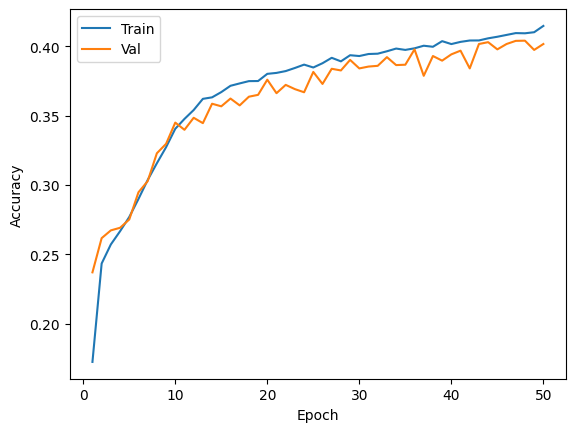

In [20]:
PlotGraph(Epoch_List, TrainAcc_List, ValAcc_List)

In [21]:
# -------------------------------------------- CIFAR-10 Dataset with 100% Randomness -----------------------------------------------------------
Option = 7
Train_DataLoader, Val_DataLoader, Test_DataLoader = CreateDataLoaders(Option, 64, RandomNoisePerc=1)
ModelName = "Model_AllConv_IOCN_CIFAR10_R100.pt"

model = AllConv_IOCN(10).to(device)
loss_criteria = nn.CrossEntropyLoss()
AdamOpt = torch.optim.Adam(model.parameters(), lr=0.0001)

ValAccuracy = 0
TrainAcc_List = []
ValAcc_List = []

saved = False
if saved == True:
    saved_model = torch.load(ModelName, map_location=torch.device('cpu')).to(device)
else:
    model.train()
    Train_Accuracy = 0

    for e in range(EPOCHS):
        Train_Accuracy = TrainModel(model, loss_criteria, AdamOpt, device, Train_DataLoader)
        val_acc = EvaluateModel(model, Val_DataLoader, device)

        TrainAcc_List.append(Train_Accuracy.cpu().item())
        ValAcc_List.append(val_acc.cpu().item())

        print("EPOCH - ", e+1, ". Train Accuracy = ", Train_Accuracy.cpu().item(), ", Validation Accuracy = ", val_acc.cpu().item())
        
        if val_acc.cpu().item() > ValAccuracy:
            print("Model Re-Saved")
            ValAccuracy = val_acc.cpu().item()
            torch.save(model, ModelName)

    saved_model = torch.load(ModelName, map_location=torch.device('cpu')).to(device)


print()

Train_Accuracy = EvaluateModel(saved_model, Train_DataLoader, device)
print("Train Accuracy = ", Train_Accuracy.cpu().item())
Test_Accuracy = EvaluateModel(saved_model, Test_DataLoader, device)
print("Test Accuracy = ", Test_Accuracy.cpu().item())

print("Generalization Gap = ", (Train_Accuracy.cpu().item() - Test_Accuracy.cpu().item()))

Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 118/118 [00:01<00:00, 67.84it/s]


EPOCH -  1 . Train Accuracy =  0.19392941892147064 , Validation Accuracy =  0.2489333301782608
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 89.93it/s]


EPOCH -  2 . Train Accuracy =  0.24896471202373505 , Validation Accuracy =  0.2677333354949951
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 91.34it/s]


EPOCH -  3 . Train Accuracy =  0.2628941237926483 , Validation Accuracy =  0.27266666293144226
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.73it/s]


EPOCH -  4 . Train Accuracy =  0.26602351665496826 , Validation Accuracy =  0.2720000147819519


100%|██████████| 118/118 [00:01<00:00, 95.19it/s]


EPOCH -  5 . Train Accuracy =  0.2743764817714691 , Validation Accuracy =  0.2712000012397766


100%|██████████| 118/118 [00:01<00:00, 92.62it/s]


EPOCH -  6 . Train Accuracy =  0.27844706177711487 , Validation Accuracy =  0.2789333462715149
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 83.37it/s]


EPOCH -  7 . Train Accuracy =  0.2852706015110016 , Validation Accuracy =  0.2808000147342682
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 72.23it/s]


EPOCH -  8 . Train Accuracy =  0.2935529351234436 , Validation Accuracy =  0.2858666777610779
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.41it/s]


EPOCH -  9 . Train Accuracy =  0.30096471309661865 , Validation Accuracy =  0.2926666736602783
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 94.04it/s]


EPOCH -  10 . Train Accuracy =  0.3125176429748535 , Validation Accuracy =  0.3142666816711426
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 91.64it/s]


EPOCH -  11 . Train Accuracy =  0.3160470724105835 , Validation Accuracy =  0.30640000104904175


100%|██████████| 118/118 [00:01<00:00, 91.61it/s]


EPOCH -  12 . Train Accuracy =  0.3227764666080475 , Validation Accuracy =  0.31653332710266113
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 94.23it/s]


EPOCH -  13 . Train Accuracy =  0.327717661857605 , Validation Accuracy =  0.3208000063896179
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 64.43it/s]


EPOCH -  14 . Train Accuracy =  0.33195292949676514 , Validation Accuracy =  0.32733333110809326
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.91it/s]


EPOCH -  15 . Train Accuracy =  0.33715295791625977 , Validation Accuracy =  0.3258666694164276


100%|██████████| 118/118 [00:01<00:00, 94.08it/s]


EPOCH -  16 . Train Accuracy =  0.34228235483169556 , Validation Accuracy =  0.3352000117301941
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.56it/s]


EPOCH -  17 . Train Accuracy =  0.34851765632629395 , Validation Accuracy =  0.3434666693210602
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.13it/s]


EPOCH -  18 . Train Accuracy =  0.35378822684288025 , Validation Accuracy =  0.35040000081062317
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.90it/s]


EPOCH -  19 . Train Accuracy =  0.3576706051826477 , Validation Accuracy =  0.3453333377838135


100%|██████████| 118/118 [00:01<00:00, 69.39it/s]


EPOCH -  20 . Train Accuracy =  0.36301177740097046 , Validation Accuracy =  0.35040000081062317


100%|██████████| 118/118 [00:01<00:00, 94.37it/s]


EPOCH -  21 . Train Accuracy =  0.3665882349014282 , Validation Accuracy =  0.3646666705608368
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.87it/s]


EPOCH -  22 . Train Accuracy =  0.36800000071525574 , Validation Accuracy =  0.36640000343322754
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 90.61it/s]


EPOCH -  23 . Train Accuracy =  0.37550589442253113 , Validation Accuracy =  0.3643999993801117


100%|██████████| 118/118 [00:01<00:00, 94.14it/s]


EPOCH -  24 . Train Accuracy =  0.37785881757736206 , Validation Accuracy =  0.3657333254814148


100%|██████████| 118/118 [00:01<00:00, 93.81it/s]


EPOCH -  25 . Train Accuracy =  0.37917646765708923 , Validation Accuracy =  0.3745333254337311
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 79.04it/s]


EPOCH -  26 . Train Accuracy =  0.38282352685928345 , Validation Accuracy =  0.3747999966144562
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 73.33it/s]


EPOCH -  27 . Train Accuracy =  0.3835529386997223 , Validation Accuracy =  0.36720001697540283


100%|██████████| 118/118 [00:01<00:00, 95.06it/s]


EPOCH -  28 . Train Accuracy =  0.38345882296562195 , Validation Accuracy =  0.3681333363056183


100%|██████████| 118/118 [00:01<00:00, 92.13it/s]


EPOCH -  29 . Train Accuracy =  0.388611763715744 , Validation Accuracy =  0.3778666853904724
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.10it/s]


EPOCH -  30 . Train Accuracy =  0.3872235417366028 , Validation Accuracy =  0.3810666799545288
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 89.75it/s]


EPOCH -  31 . Train Accuracy =  0.39209410548210144 , Validation Accuracy =  0.3792000114917755


100%|██████████| 118/118 [00:01<00:00, 93.16it/s]


EPOCH -  32 . Train Accuracy =  0.39047059416770935 , Validation Accuracy =  0.37093332409858704


100%|██████████| 118/118 [00:01<00:00, 64.28it/s]


EPOCH -  33 . Train Accuracy =  0.3922823667526245 , Validation Accuracy =  0.3810666799545288


100%|██████████| 118/118 [00:01<00:00, 90.28it/s]


EPOCH -  34 . Train Accuracy =  0.39303529262542725 , Validation Accuracy =  0.3893333375453949
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 91.12it/s]


EPOCH -  35 . Train Accuracy =  0.3939058780670166 , Validation Accuracy =  0.3810666799545288


100%|██████████| 118/118 [00:01<00:00, 91.59it/s]


EPOCH -  36 . Train Accuracy =  0.3969646990299225 , Validation Accuracy =  0.39239999651908875
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 92.80it/s]


EPOCH -  37 . Train Accuracy =  0.3984000086784363 , Validation Accuracy =  0.3720000088214874


100%|██████████| 118/118 [00:01<00:00, 91.58it/s]


EPOCH -  38 . Train Accuracy =  0.396329402923584 , Validation Accuracy =  0.3922666609287262


100%|██████████| 118/118 [00:01<00:00, 72.94it/s]


EPOCH -  39 . Train Accuracy =  0.39731764793395996 , Validation Accuracy =  0.38173332810401917


100%|██████████| 118/118 [00:01<00:00, 70.71it/s]


EPOCH -  40 . Train Accuracy =  0.4017176628112793 , Validation Accuracy =  0.37906667590141296


100%|██████████| 118/118 [00:01<00:00, 93.60it/s]


EPOCH -  41 . Train Accuracy =  0.40087059140205383 , Validation Accuracy =  0.39160001277923584


100%|██████████| 118/118 [00:01<00:00, 92.68it/s]


EPOCH -  42 . Train Accuracy =  0.4018588364124298 , Validation Accuracy =  0.390666663646698


100%|██████████| 118/118 [00:01<00:00, 93.40it/s]


EPOCH -  43 . Train Accuracy =  0.40308234095573425 , Validation Accuracy =  0.3946666717529297
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.48it/s]


EPOCH -  44 . Train Accuracy =  0.4054352939128876 , Validation Accuracy =  0.39213332533836365


100%|██████████| 118/118 [00:01<00:00, 91.70it/s]


EPOCH -  45 . Train Accuracy =  0.40498822927474976 , Validation Accuracy =  0.39186668395996094


100%|██████████| 118/118 [00:01<00:00, 65.15it/s]


EPOCH -  46 . Train Accuracy =  0.4050823450088501 , Validation Accuracy =  0.38280001282691956


100%|██████████| 118/118 [00:01<00:00, 87.60it/s]


EPOCH -  47 . Train Accuracy =  0.40560001134872437 , Validation Accuracy =  0.39480000734329224
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 93.96it/s]


EPOCH -  48 . Train Accuracy =  0.40818822383880615 , Validation Accuracy =  0.396533340215683
Model Re-Saved


100%|██████████| 118/118 [00:01<00:00, 91.19it/s]


EPOCH -  49 . Train Accuracy =  0.40752941370010376 , Validation Accuracy =  0.395466685295105


100%|██████████| 118/118 [00:01<00:00, 91.90it/s]


EPOCH -  50 . Train Accuracy =  0.40644705295562744 , Validation Accuracy =  0.4005333483219147
Model Re-Saved



100%|██████████| 665/665 [00:08<00:00, 81.96it/s]


Train Accuracy =  0.4103529453277588


100%|██████████| 157/157 [00:01<00:00, 93.19it/s]

Test Accuracy =  0.4047999978065491
Generalization Gap =  0.005552947521209717


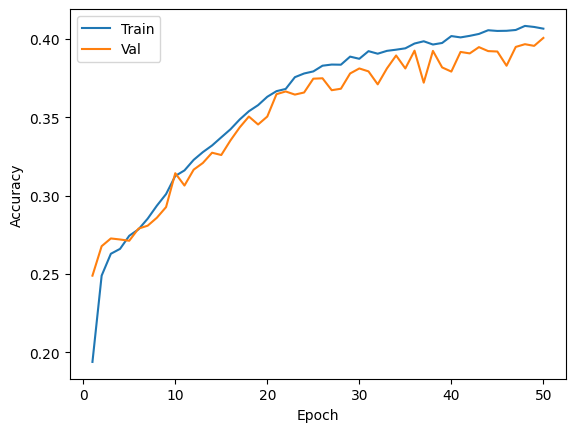

In [22]:
PlotGraph(Epoch_List, TrainAcc_List, ValAcc_List)